Import libraries



In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
df = pd.read_csv('breast-cancer.csv')
display(df.head())
print(df.shape)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 32)


In [47]:
display(df.info())
display(df.describe())
display(df['diagnosis'].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


,count
diagnosis,
0,357
1,212


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

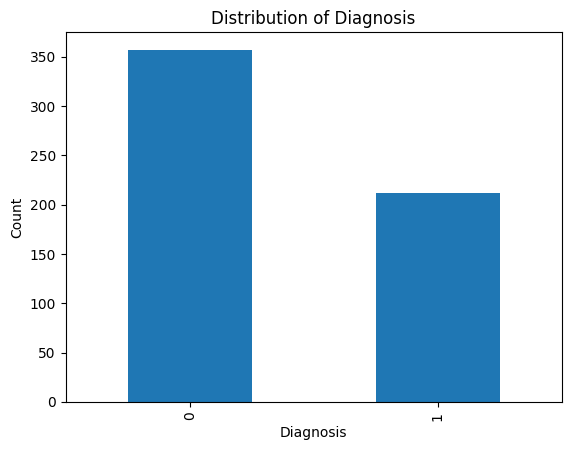

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [48]:
df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()
display(df.isnull().sum())

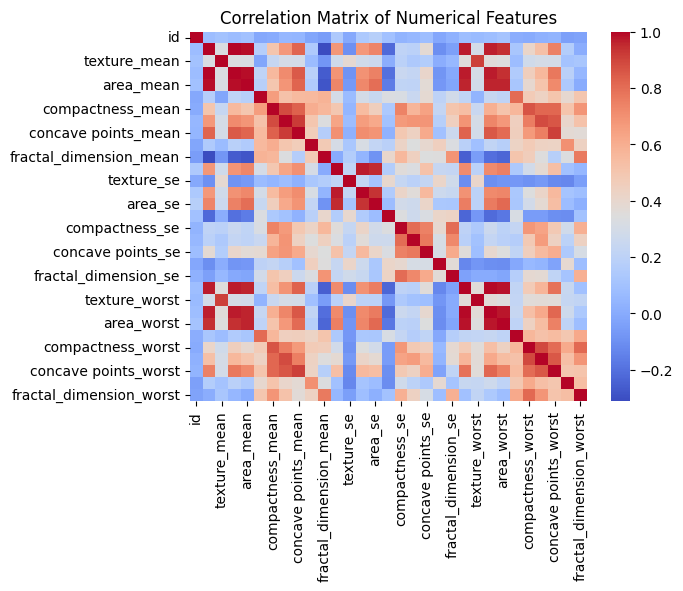

,count
diagnosis,
0,357
1,212


In [49]:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()
display(df['diagnosis'].value_counts())

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>],
       [<Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>],
       [<Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave p

<Axes: >

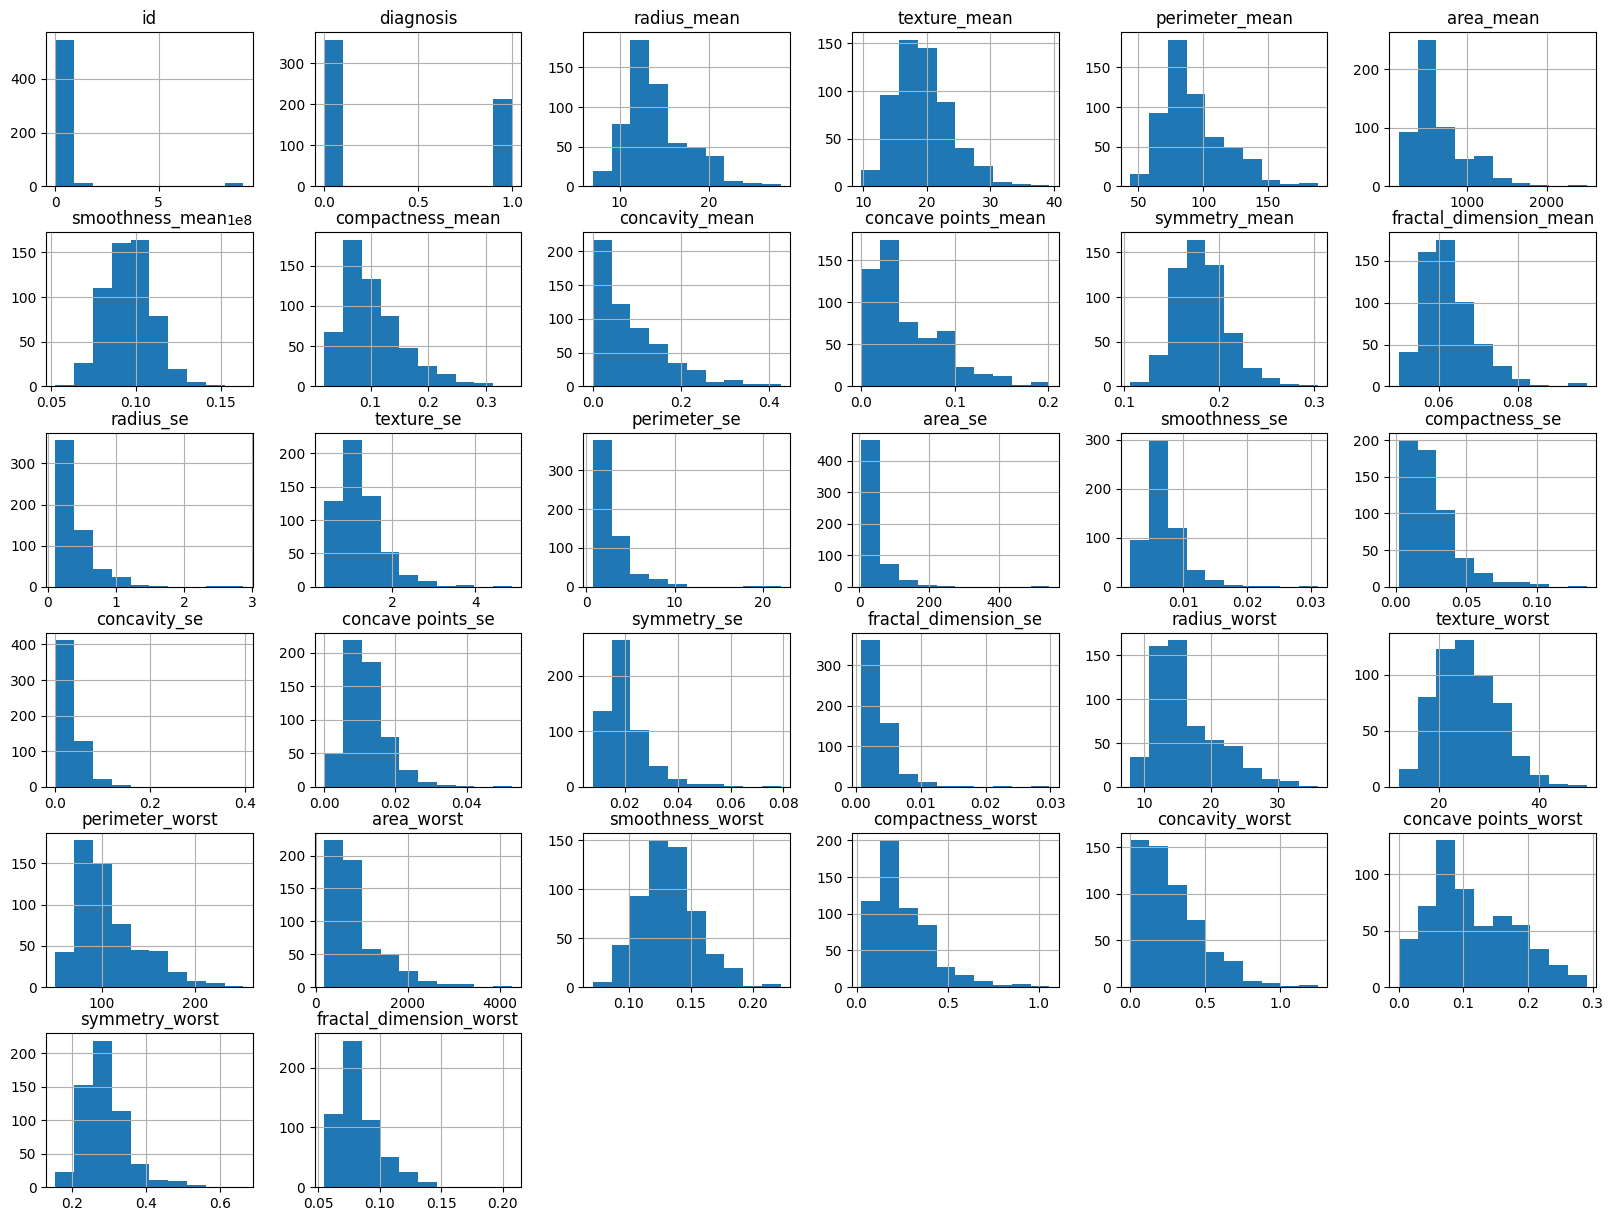

In [50]:
numerical_features = df.select_dtypes(include=['number'])
display(numerical_features.hist(figsize=(20, 15)))
display(numerical_features.boxplot(figsize=(20, 15)))

In [36]:

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
y = df['diagnosis']
scaler = StandardScaler()
features_to_scale = df.columns.difference(['id', 'diagnosis'])
X_scaled = scaler.fit_transform(df[features_to_scale])
X_scaled = pd.DataFrame(X_scaled, columns=features_to_scale, index=df.index)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

display(X_train.head())
display(y_train.head())
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
68,-1.150124,-0.498714,-0.977194,0.700428,3.385892,1.159269,-0.133333,3.475158,0.919592,2.814833,...,-1.234044,0.728714,0.836041,0.693984,1.093024,2.594434,2.147190,-0.456023,-0.041464,-0.492965
181,1.866047,0.904775,2.124291,3.389643,1.235822,3.207003,2.596960,0.628378,2.675218,2.007548,...,2.155897,1.262455,-0.929364,0.733436,2.129892,-0.310239,1.936879,1.694187,-0.823628,1.270634
63,-1.120545,-0.370004,-1.002860,-0.318972,0.776969,-0.550038,-0.699511,0.617023,-0.970486,-0.363081,...,-1.296169,-1.362838,0.565697,-1.490797,1.932741,2.588380,0.616770,-1.263516,1.901698,-1.049890
248,-0.875668,-0.521376,-0.746907,-0.606466,-0.845505,-0.728158,-0.845247,-0.900448,-0.810759,-0.816190,...,-0.832304,0.014925,0.049342,0.768505,0.311723,0.125643,0.822228,1.380033,0.501025,1.549097
60,-0.975496,-0.125786,-0.900022,-0.449737,-0.809735,-0.989865,-0.929077,-0.584464,-1.352369,-0.978777,...,-1.087016,1.212639,0.157680,-0.213419,3.400421,2.577483,1.061659,-1.026155,0.406679,-1.339752


,diagnosis
68,0
181,1
63,0
248,0
60,0


X_train shape: (455, 30), y_train shape: (455,)
X_test shape: (114, 30), y_test shape: (114,)


In [37]:
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC()

In [38]:
vm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_linear.fit(X_train, y_train)
print("Linear SVM trained successfully.")
svm_rbf.fit(X_train, y_train)
print("RBF SVM trained successfully.")

Linear SVM trained successfully.
RBF SVM trained successfully.


In [39]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_svm_rbf = grid_search.best_estimator_

Best hyperparameters: {'C': 10, 'gamma': 0.01}
Best score: 0.9736263736263737


In [46]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_best_rbf = best_svm_rbf.predict(X_test)
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return pd.DataFrame({
            'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC'],
            'Value': [accuracy, precision, recall, f1, roc_auc]
        }, index=[model_name] * 5)

results_linear = evaluate_model(y_test, y_pred_linear, "Linear SVM")
results_rbf = evaluate_model(y_test, y_pred_rbf, "RBF SVM")
results_best_rbf = evaluate_model(y_test, y_pred_best_rbf, "Optimized RBF SVM")
results = pd.concat([results_linear, results_rbf, results_best_rbf])
display(results)

,Metric,Value
Linear SVM,Accuracy,0.956140
Linear SVM,Precision,0.931818
Linear SVM,Recall,0.953488
Linear SVM,F1-score,0.942529
Linear SVM,AUC-ROC,0.955617
RBF SVM,Accuracy,0.973684
RBF SVM,Precision,0.976190
RBF SVM,Recall,0.953488
RBF SVM,F1-score,0.964706
RBF SVM,AUC-ROC,0.969702


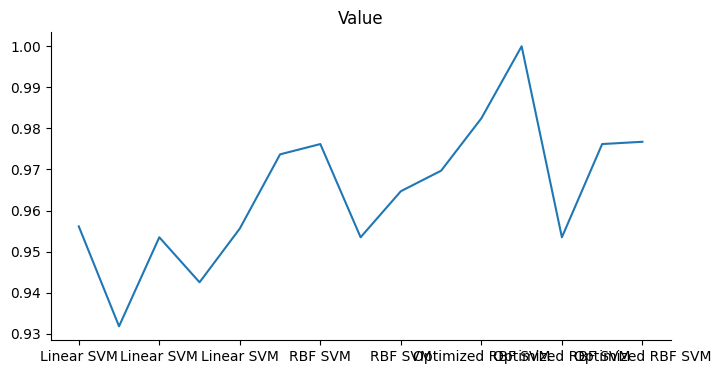

In [41]:
from matplotlib import pyplot as plt
results['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-42-6f3afc8c0bd6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(results, x='Value', y='Metric', inner='stick', palette='Dark2')


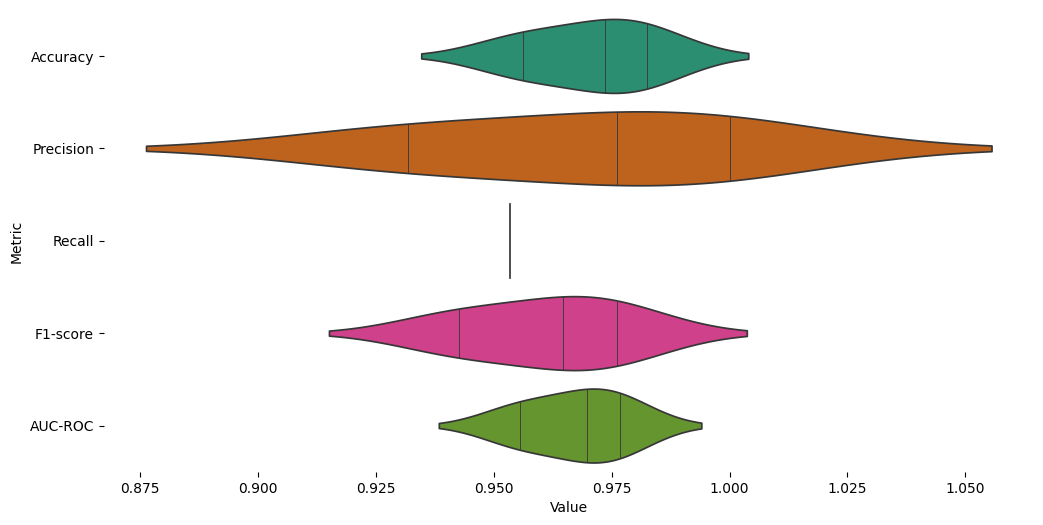

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='Value', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

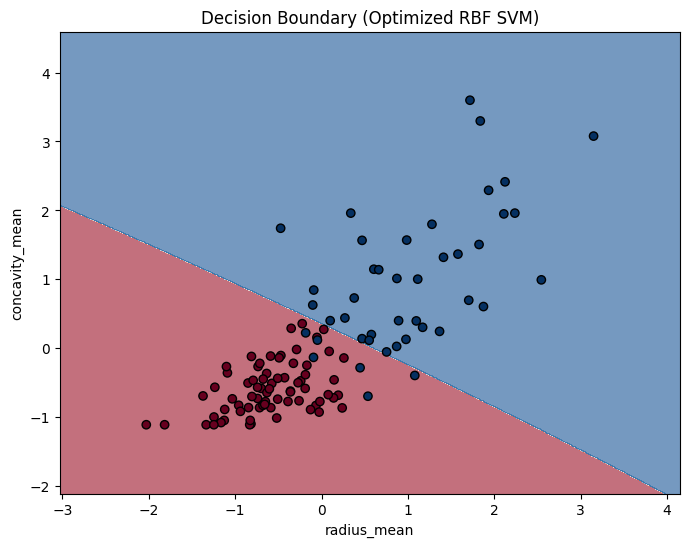

In [43]:
feature1 = 'radius_mean'
feature2 = 'concavity_mean'
x_min, x_max = X_test[feature1].min() - 1, X_test[feature1].max() + 1
y_min, y_max = X_test[feature2].min() - 1, X_test[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_best_rbf, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(X_test[feature1], X_test[feature2], c=y_test, cmap=plt.cm.RdBu, edgecolors='k')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary (Optimized RBF SVM)')
plt.show()

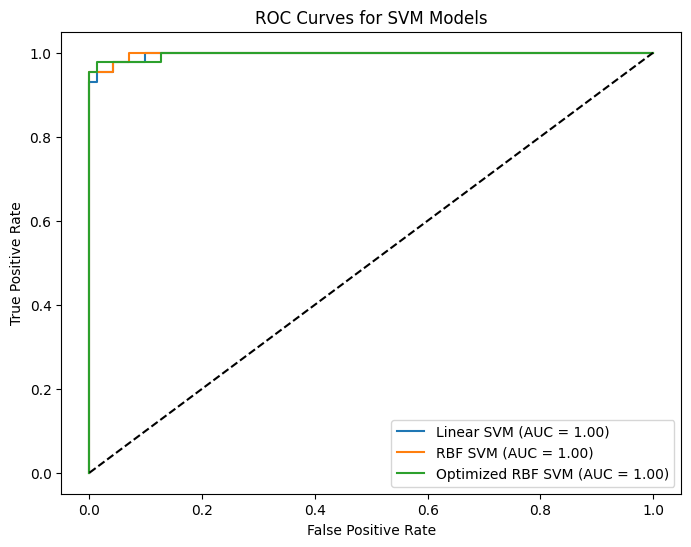

In [44]:
plt.figure(figsize=(8, 6))
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_prob_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)
plt.plot(fpr_linear, tpr_linear, label=f'Linear SVM (AUC = {roc_auc_linear:.2f})')

fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_prob_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)
plt.plot(fpr_rbf, tpr_rbf, label=f'RBF SVM (AUC = {roc_auc_rbf:.2f})')

fpr_best_rbf, tpr_best_rbf, _ = roc_curve(y_test, y_prob_best_rbf)
roc_auc_best_rbf = auc(fpr_best_rbf, tpr_best_rbf)
plt.plot(fpr_best_rbf, tpr_best_rbf, label=f'Optimized RBF SVM (AUC = {roc_auc_best_rbf:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVM Models')
plt.legend(loc='lower right')
plt.show()